# Синицин Дмитрий
## БКЛ181
## Домашнее задание №2.1

### Устанавливаем все необходимые пакеты:

In [20]:
!pip install pycodestyle flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
!pip install pymystem3

!pip install nltk

!pip install pymorphy2

### Устанавливаем все необходимые модули:

In [3]:
from pymystem3 import Mystem
import json
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import nltk
import collections

## Задание №1
### Скачиваем текст и преобразуем его в строку для дальнейшего анализа:

In [4]:
text = open('nabokov.txt', 'r', encoding='utf-8')
text_str = text.read()

## Задание №2
### Делаем анализ текста, замеряем время работы и соханяем анализ в файле формата json:

In [5]:
%%time
m = Mystem()
analis = m.analyze(text_str)
with open('analis_json','w',encoding='utf-8') as f:
    json.dump(analis, f, ensure_ascii=False)

Wall time: 10min 32s


## Задание №3
### Создаем массив, в который сгружаем токенезированный текст, и "чистим" его от заглавных букв, а заодно уберем и знаки препинания:

In [6]:
%%time
mass = []
morph = MorphAnalyzer()
tokenized = word_tokenize(text_str)
tokenized_cleaned = [w.lower() for w in tokenized if w.isalpha()]
for i in tokenized_cleaned:
    ana = morph.parse(i)
    mass.append(ana) 

Wall time: 12.5 s


### Создаем массив, в котором будем хранить леммы и части речи, и загружаем их туда:

In [7]:
lemmas = []
for i in mass:
    first = i[0]
    form = [first.normal_form, first.tag.POS]
    lemmas.append(form)

### Cохраняем получившийся массив в файле формата json:

In [8]:
with open('pymorphy_json', 'w', encoding='utf-8') as f:
    json.dump(lemmas, f, ensure_ascii=False)

## Задание №4
### Проверяем, какие части речи присутствуют в тексте, считаем их. В результат выводим процент всех частей речи от общего количества слов:

In [9]:
forms_counter = collections.Counter()
n = 0
for i in lemmas:
    n = n + 1
    form = i[1]
    forms_counter[form] += 1
for form in forms_counter:
    print(form, round(forms_counter[form]/n, 3))

NOUN 0.273
ADJF 0.141
ADJS 0.01
CONJ 0.101
ADVB 0.068
PREP 0.114
VERB 0.105
NPRO 0.066
PRCL 0.045
NUMR 0.005
PRTF 0.021
PRTS 0.002
INFN 0.018
GRND 0.016
COMP 0.003
None 0.008
PRED 0.003
INTJ 0.002


### Теперь считаем глаголы и выводим Топ-20 глаголов:

In [10]:
verb_count = collections.Counter()
for i in lemmas:
    if i[1] == 'VERB':
        verb_count[i[0]] += 1
top_verb = verb_count.most_common(20)
print('Топ-20 самых частотных глаголов:')
for i in top_verb:
    print(i[0], i[1])

Топ-20 самых частотных глаголов:
быть 208
мочь 45
знать 29
сказать 25
идти 19
говорить 19
бывать 17
читать 14
сидеть 12
думать 11
видеть 11
заметить 10
начать 10
стать 10
выйти 10
жить 10
увидеть 9
стоить 9
хотеть 9
писать 9


### Делаем тоже самое для причастий:

In [11]:
adv_count = collections.Counter()
for i in lemmas:
    if i[1] == 'ADVB':
        adv_count[i[0]] += 1
top_adv = adv_count.most_common(20)
print('Топ-20 самых частотных причастий:')
for i in top_adv:
    print(i[0], i[1])

Топ-20 самых частотных причастий:
уже 54
где 45
там 32
вдруг 29
теперь 26
тут 23
очень 21
опять 21
совершенно 20
едва 18
потом 17
совсем 17
потому 16
уж 16
долго 15
тогда 13
наконец 13
всегда 13
несколько 12
сейчас 12


### И делаем тоже самое для существительных потому что никто не знает когда это может понадобится 

In [12]:
noun_count = collections.Counter()
for i in lemmas:
    if i[1] == 'NOUN':
        noun_count[i[0]] += 1
top_noun = noun_count.most_common(20)
print('Топ-20 самых частотных существительных:')
for i in top_noun:
    print(i[0], i[1])

Топ-20 самых частотных существительных:
константин 52
стих 45
фёдор 36
рука 35
год 33
комната 33
яков 32
лицо 28
александр 28
нога 27
глаз 27
угол 26
яша 26
васильев 25
улица 24
раз 24
слово 24
время 24
день 23
человек 23


## Задание №5
### Создаем массив. С помощью Counter считаем биграммы и триграммы. Из них сохраняем первые 25 штук:

In [13]:
mass = []
for i in lemmas:
    mass.append(i[0])
bigrams = nltk.bigrams(mass)
trigrams = nltk.trigrams(mass)
bigrams_count = collections.Counter(bigrams).most_common(25)
trigrams_count = collections.Counter(trigrams).most_common(25)

### Печатаем самые частотные биграммы:

In [14]:
print('Топ-25 биграмм:')
for i in bigrams_count:
    print(i[0])

Топ-25 биграмм:
('фёдор', 'константин')
('александр', 'яков')
('так', 'что')
('я', 'не')
('и', 'в')
('это', 'быть')
('он', 'в')
('и', 'он')
('не', 'знать')
('не', 'мочь')
('и', 'не')
('у', 'он')
('он', 'не')
('и', 'с')
('федора', 'константин')
('он', 'быть')
('мочь', 'быть')
('что', 'я')
('к', 'он')
('что', 'он')
('который', 'я')
('который', 'он')
('не', 'быть')
('что', 'в')
('как', 'в')


### Печатаем самые частотные триграммы:

In [15]:
print('Топ-25 триграмм:')
for i in trigrams_count:
    print(i[0])

Топ-25 триграмм:
('до', 'сей', 'пора')
('едва', 'ли', 'не')
('мы', 'с', 'таня')
('между', 'тем', 'как')
('тот', 'место', 'где')
('сам', 'по', 'себя')
('я', 'не', 'знать')
('благодарить', 'ты', 'отчизна')
('о', 'тот', 'как')
('в', 'который', 'он')
('потому', 'ли', 'что')
('в', 'конец', 'конец')
('один', 'из', 'тот')
('год', 'тот', 'назад')
('там', 'и', 'сям')
('что', 'я', 'не')
('по', 'сравнение', 'с')
('я', 'не', 'мочь')
('он', 'идти', 'по')
('а', 'потому', 'что')
('ни', 'в', 'чем')
('в', 'тот', 'год')
('подумать', 'фёдор', 'константин')
('и', 'на', 'мгновение')
('ты', 'отчизна', 'за')


## Домашнее задание №2.2
#### Я сделал второе задание из дз 2.2 в этом файле так как тут все необходимые данные, а дз 2.1 я еще не сдавал, остальная часть будет в отдельном файле

In [16]:
import matplotlib.pyplot as plt

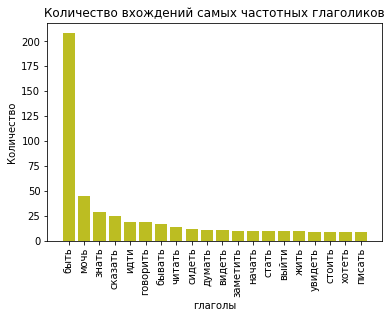

In [17]:
Y = [i[0] for i in top_verb]
X = [i[1] for i in top_verb]
plt.bar(Y, X, color='tab:olive')
plt.xticks(rotation='vertical')
plt.title('Количество вхождений самых частотных глаголиков')
plt.ylabel('Количество')
plt.xlabel('глаголы')
plt.show()

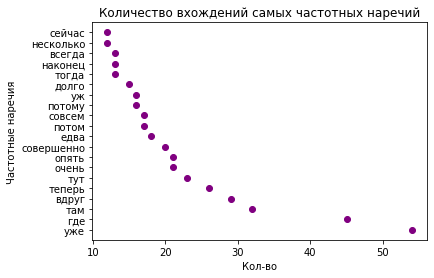

In [18]:
Y = [i[0] for i in top_adv]
X = [i[1] for i in top_adv]
plt.scatter(X, Y, color='purple', label='verbs') 
plt.title('Количество вхождений самых частотных наречий')
plt.ylabel('Частотные наречия')
plt.xlabel('Кол-во')
plt.show()

### уже, где и там довольно частотные наречия и в обыденной жизни. Если сравнить количество вхождений в НКРЯ именно этих слов со всеми остальными, то можно удивится. Тоже самое можно сказать и про глаголы, особенно глагол быть, он не только часто используется по прямому значению, но еще и состоит в аналитической форме образующей будущее время в русском языке "буду играть на скрипке" и тд

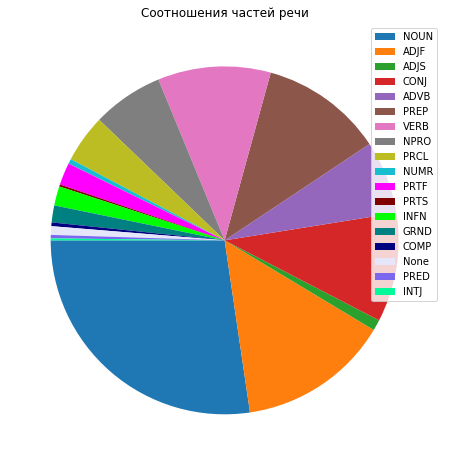

In [19]:
import matplotlib.pyplot as plt

labels = [str(i) for i in forms_counter]
size = list(forms_counter.values())
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', '#FF00FF',
          '#800000', '#00FF00', '#008080', '#000080', '#E6E6FA', '#7B68EE', '#00FA9A']
plt.figure(figsize=(8, 8))
plt.title('Cоотношения частей речи')
plt.pie(size, colors=colors, startangle=180)
plt.legend(labels, loc="best")
plt.show()

### Обоснование: ну вообще логично предположить, что существительные составляют большую часть, так как именно они занимают больший объем почти что любого текста